# Machine Learning applied to MuJoCo environment – Forward Kinematics

* ### Author: Mowibox (Ousmane THIONGANE)
* ### Date: November 4th, 2024

## Imports

In [4]:
import os
from utils import *
import numpy as np
from tensorflow.keras.models import load_model

## I - Loading the models

The algorithm below loads the various models in the folder of the same name, separating them into different lists according to the type of robot arm. To be able to know which model you're using when you use one, I've created a Model class whose attributes include the model and the name of the corresponding file:

In [5]:
models_dir = 'models'
MODELS_2R = []
MODELS_3R = []
MODELS_5R = []

if os.path.exists(models_dir) and os.path.isdir(models_dir):
    for filename in os.listdir(models_dir):
        filepath = os.path.join(models_dir, filename)
        if os.path.isfile(filepath) and filename.endswith('.keras'):
            if '2R' in filename:
                model = load_model(filepath, 
                                   custom_objects={'angular_loss': angular_loss})
                model = Model(model=model, 
                              name=filename)
                print(f"2R Model found : {filename}")
                MODELS_2R.append(model)
            elif '3R' in filename:
                model = load_model(filepath, 
                                   custom_objects={'angular_loss': angular_loss})
                model = Model(model=model, 
                              name=filename)
                print(f"3R Model found : {filename}")
                MODELS_3R.append(model)
            elif '5R' in filename:
                model = load_model(filepath, 
                                   custom_objects={'angular_loss': angular_loss})
                model = Model(model=model, 
                              name=filename)
                print(f"5R Model found : {filename}")
                MODELS_5R.append(model)
else:
    print(f"The folder '{models_dir}' does not exists!")


print(f"Number of 2R models : {len(MODELS_2R)}")
print(f"Number of 3R models : {len(MODELS_3R)}")
print(f"Number of 5R models : {len(MODELS_5R)}")

2R Model found : NN1_2R_p10_e20.keras
3R Model found : NN1_3R_p10_e20.keras
2R Model found : NN2_2R_p10_e20.keras
3R Model found : NN2_3R_p10_e20.keras
5R Model found : NN2_5R_p80_e20.keras
2R Model found : NN3_2R_p10_e20_raw.keras
3R Model found : NN3_3R_p10_e20_raw.keras
5R Model found : NN3_5R_p75_e20_raw.keras
2R Model found : NN4_2R_p10_e20_raw.keras
3R Model found : NN4_3R_p10_e20_raw.keras
5R Model found : NN4_5R_p75_e20_raw.keras
Number of 2R models : 4
Number of 3R models : 4
Number of 5R models : 3


## II - Forward Kinematics & Jacobian Matrix

To test models, call up a list element with the 'model' attribute to get the model, and the 'get_name()' method to get its name. We then test a list of joint configurations and display the direct kinematics.

### 2.1) 2R robot

#### Forward Kinematics

We compare the known analytical solution with the model's prediction. The `display_error` option in the dispFK_2R function allows us to return the error in distance between the model and reality:

Example with (j0, j1) = (0, 0)
End-effector predicted X-position: 0.20793825387954712
End-effector predicted Y-position: -0.006057717837393284


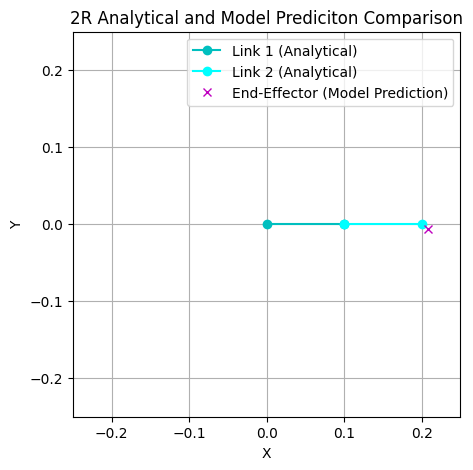

Distance error: 0.009985580606735768

Example with (j0, j1) = (1.5707963267948966, 1.5707963267948966)
End-effector predicted X-position: -0.10968255996704102
End-effector predicted Y-position: 0.09929696470499039


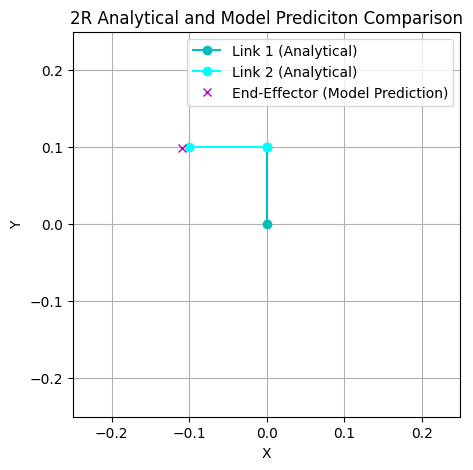

Distance error: 0.009708049553920422

Example with (j0, j1) = (1.5707963267948966, 0.7853981633974483)
End-effector predicted X-position: -0.0748463124036789
End-effector predicted Y-position: 0.17410710453987122


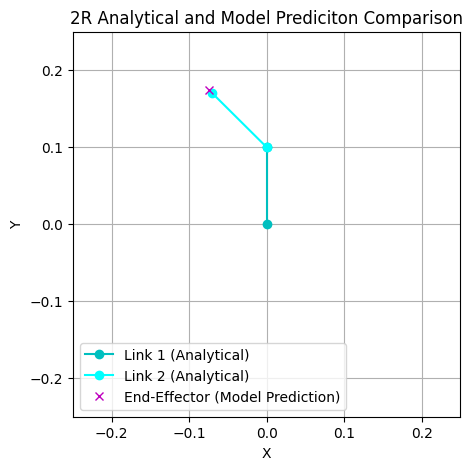

Distance error: 0.00535155896671282



In [6]:
index = 1

model_2R = MODELS_2R[index].model
name_2R = MODELS_2R[index].get_name()

raw = True if 'raw' in name_2R else False

THETA_LST = [(0, 0), (np.pi/2, np.pi/2), (np.pi/2, np.pi/4)]

for theta in THETA_LST:
    ee_x_pred, ee_y_pred = FK(model_2R, theta, raw)
    print(f"Example with (j0, j1) = {theta}")
    print(f"End-effector predicted X-position: {ee_x_pred}")
    print(f"End-effector predicted Y-position: {ee_y_pred}")
    result_model = FK(model_2R, theta, raw)  
    dispFK_2R(result_model, theta, display_error=True)

#### Jacobian matrix 

The Jacobian matrix represents the relationship between a set of positions $r\in\mathbb{R}^m$ and a set of angles $q \in \mathbb{R}^n$. It describes how changes in joint variables $q$ affect the position and orientation of the robot $r$.

For:

$
\mathbf{f}_r = \begin{bmatrix}
f_1(q) \\
\vdots \\
f_m(q)
\end{bmatrix}, \quad q = \begin{bmatrix}
q_1 \\
\vdots \\
q_n
\end{bmatrix}
$

The Jacobian matrix is defined as:

$
\mathbf{J}_r(q) = \begin{bmatrix}
\frac{\partial f_1(q)}{\partial q_1} & \cdots & \frac{\partial f_1(q)}{\partial q_n} \\
\vdots & \ddots & \vdots \\
\frac{\partial f_m(q)}{\partial q_1} & \cdots & \frac{\partial f_m(q)}{\partial q_n}
\end{bmatrix}
$

The two Jacobian matrices have a function implemented to display them:

In [7]:
theta = [np.pi/4, np.pi/2]  

learned_J = FK_Jacobian_pred(model_2R, theta, raw)
print(f"Jacobian Matrix predicted:\n{learned_J}")

analytical_J = FK_Jacobian_analytic_2R(theta)
print(f"Jacobian Matrix analytical:\n{learned_J}")

Jacobian Matrix predicted:
[[-0.1366041  -0.07025792]
 [ 0.00956803 -0.08555619]]
Jacobian Matrix analytical:
[[-0.1366041  -0.07025792]
 [ 0.00956803 -0.08555619]]


### 2.2) 3R robot

#### Forward Kinematics

Example with (j0, j1, j2) = (0, 0, 0)
End-effector predicted X-position: 0.30376920104026794
End-effector predicted Y-position: 0.0021690726280212402


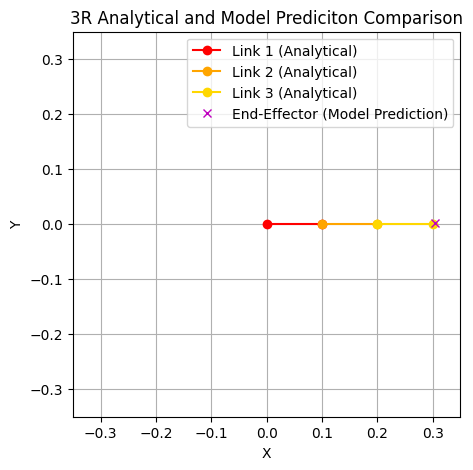

Distance error: 0.0043487644851828424

Example with (j0, j1, j2) = (0.7853981633974483, 0.7853981633974483, 0.7853981633974483)
End-effector predicted X-position: -0.012591516599059105
End-effector predicted Y-position: 0.23895716667175293


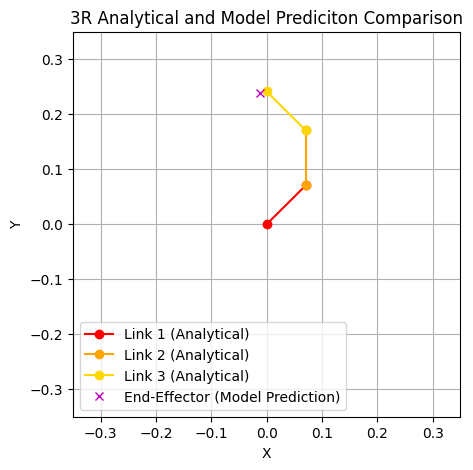

Distance error: 0.01283037491577621

Example with (j0, j1, j2) = (0, 1.5707963267948966, 1.5707963267948966)
End-effector predicted X-position: -0.008966302499175072
End-effector predicted Y-position: 0.10283700376749039


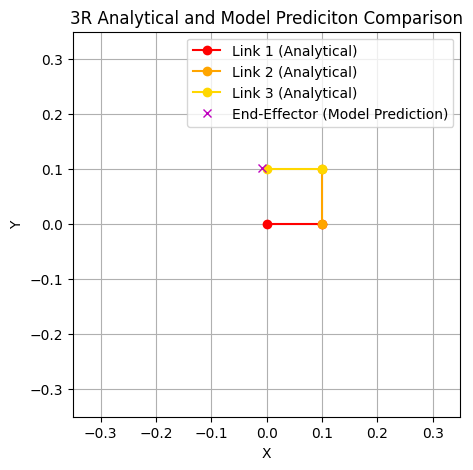

Distance error: 0.00940442294260885



In [8]:
index = 1

model_3R = MODELS_3R[index].model
name_3R = MODELS_3R[index].get_name()

raw = True if 'raw' in name_3R else False

THETA_LST = [(0, 0, 0), (np.pi/4, np.pi/4, np.pi/4), (0, np.pi/2, np.pi/2)]

for theta in THETA_LST:
    ee_x_pred, ee_y_pred = FK(model_3R, theta, raw)
    print(f"Example with (j0, j1, j2) = {theta}")
    print(f"End-effector predicted X-position: {ee_x_pred}")
    print(f"End-effector predicted Y-position: {ee_y_pred}")
    result_model = FK(model_3R, theta, raw)  
    dispFK_3R(result_model, theta, display_error=True)


#### Jacobian Matrix

In [9]:
theta = [np.pi/4, np.pi/5, np.pi/4]  

learned_J = FK_Jacobian_pred(model_3R, theta, raw)
print(f"Jacobian Matrix predicted:\n{learned_J}")

analytical_J = FK_Jacobian_analytic_3R(theta)
print(f"Jacobian Matrix analytical:\n{analytical_J}")


Jacobian Matrix predicted:
[[-0.2813249  -0.2230428  -0.11159765]
 [ 0.06030931 -0.05547525 -0.07636823]]
Jacobian Matrix analytical:
[[-0.25038121 -0.17967053 -0.0809017 ]
 [ 0.0275756  -0.04313508 -0.05877853]]


### 2.3) 5R robot

#### Forward Kinematics

In [14]:
index = 0 

model_5R = MODELS_5R[index].model
name_5R = MODELS_5R[index].get_name()

raw = True if 'raw' in name_5R else False

THETA_LST = [(0, 0, 0, 0, 0), (np.pi/4, np.pi/4, np.pi/4, np.pi/4, -np.pi/2)]

for theta in THETA_LST:
    ee_x_pred, ee_y_pred, ee_z_pred = FK(model_5R, theta, raw)
    print(f"Example with (j0, j1, j2, j3, j4) = {theta}")
    print(f"End-effector predicted X-position: {ee_x_pred}")
    print(f"End-effector predicted Y-position: {ee_y_pred}")
    print(f"End-effector predicted Z-position: {ee_z_pred}")
    print("\n")

Example with (j0, j1, j2, j3, j4) = (0, 0, 0, 0, 0)
End-effector predicted X-position: 0.0009530186653137207
End-effector predicted Y-position: 0.003853052854537964
End-effector predicted Z-position: 0.5807977914810181


Example with (j0, j1, j2, j3, j4) = (0.7853981633974483, 0.7853981633974483, 0.7853981633974483, 0.7853981633974483, -1.5707963267948966)
End-effector predicted X-position: 0.09994493424892426
End-effector predicted Y-position: 0.27854278683662415
End-effector predicted Z-position: 0.13057635724544525




#### Jacobian matrix

In [11]:
theta = [np.pi/4, np.pi/2, np.pi/4, np.pi/4, np.pi/4]  

learned_J = FK_Jacobian_pred(model_5R, theta, raw)
print(f"Jacobian Matrix predicted:\n{learned_J}")

Jacobian Matrix predicted:
[[-0.07122441 -0.22732686 -0.24484095 -0.17414188  0.07177784]
 [ 0.13568181 -0.17234108 -0.2016801  -0.15019879 -0.05356657]
 [ 0.0148744  -0.13005659 -0.05147086  0.02396524  0.07528757]]


## III - Global Mean Absolute Error (MAE)

The Mean Absolute Error (MAE) is a metric used to evaluate the accuracy of a predicted Jacobians.

The formula for MAE is:

$
\text{MAE} = \frac{1}{N} \sum \left| J_{\text{pred}} - J_{\text{real}} \right|
$


### 3.1) 2R robot

To obtain a global MAE, we calculate the MAE between the Jacobians for a defined number of points and average the result:

In [12]:
theta_values = np.linspace(0, 2*np.pi, 50)

for model in MODELS_2R:
    model_2R = model.model
    name_2R =  model.get_name()
    if 'raw' in name_2R:
        raw = True
    else: 
        raw = False

    mae_values = []
    for j0 in theta_values:
        for j1 in theta_values:
            theta = [j0, j1]

            learned_J = FK_Jacobian_pred(model_2R, theta, raw)
            analytical_J = FK_Jacobian_analytic_2R(theta)

            mae = (np.linalg.norm(learned_J - analytical_J))
            mae_values.append(mae)

    global_mae = np.mean(mae_values)
    print(f"Model: '{name_2R[:-6]}' Global MAE: {global_mae}")

Model: 'NN1_2R_p10_e20' Global MAE: 0.06318403035402298
Model: 'NN2_2R_p10_e20' Global MAE: 0.037344664335250854
Model: 'NN3_2R_p10_e20_raw' Global MAE: 0.16922901570796967
Model: 'NN4_2R_p10_e20_raw' Global MAE: 0.1557282954454422


### 3.2) 3R robot

In [13]:
theta_values = np.linspace(0, 2*np.pi, 12)

for model in MODELS_3R:
    model_3R = model.model
    name_3R =  model.get_name()
    if 'raw' in name_3R:
        raw = True
    else: 
        raw = False

    mae_values = []
    for j0 in theta_values:
        for j1 in theta_values:
            for j2 in theta_values:
                theta = [j0, j1, j2]

                learned_J = FK_Jacobian_pred(model_3R, theta, raw)
                analytical_J = FK_Jacobian_analytic_3R(theta)

                mae = (np.linalg.norm(learned_J - analytical_J))
                mae_values.append(mae)

    global_mae = np.mean(mae_values)
    print(f"Model '{name_3R[:-6]}' Global MAE: {global_mae}")

Model 'NN1_3R_p10_e20' Global MAE: 0.1985860913991928
Model 'NN2_3R_p10_e20' Global MAE: 0.09953592717647552
Model 'NN3_3R_p10_e20_raw' Global MAE: 0.2359829694032669
Model 'NN4_3R_p10_e20_raw' Global MAE: 0.24666254222393036
